In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sfm.plotstyle import set_seaborn_style, set_style_after

import os

In [2]:
# list all runs in runs/
# Get current notebook path since __file__ isn't defined in notebooks
currentfile = os.path.abspath('')
currentdir = os.path.dirname(currentfile)
runs = os.listdir(f"{currentdir}/runs")
print(runs)

# filter for target distributions
targetdist = "moons"
runs = [run for run in runs if f"-{targetdist}" in run]
print(runs)


['dirichlet-moons-ot', 'normal-moons-ot', 'uniform-moons-ot', 'gaussian-moons-ot', 'laplace-moons-ot', '8gaussians-moons-ot', 'mog-moons-ot']
['dirichlet-moons-ot', 'normal-moons-ot', 'uniform-moons-ot', 'gaussian-moons-ot', 'laplace-moons-ot', '8gaussians-moons-ot', 'mog-moons-ot']


In [3]:
# list files in first run
files = os.listdir(f"{currentdir}/runs/{runs[0]}")
print(files)


['train', 'sidebyside', 'logprob_dirichlet-to-moons_sidebyside.png', 'losses.npy', 'mysimplemlp_10000.pth', 'logprob_traj_dirichlet-to-moons.gif', 'trajectory', 'logprobs_train.npy']


dirichlet


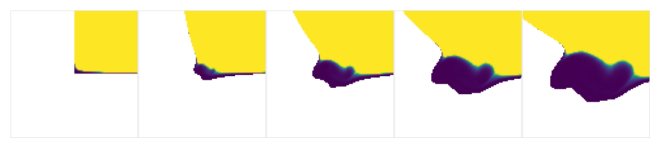

normal


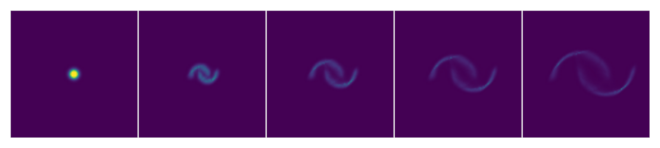

uniform


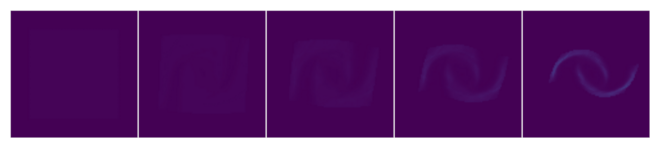

gaussian


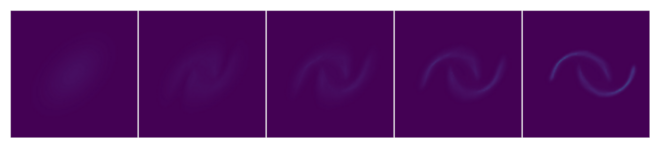

laplace


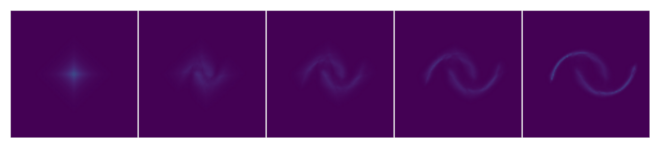

8gaussians


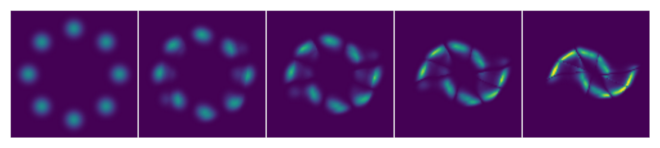

mog


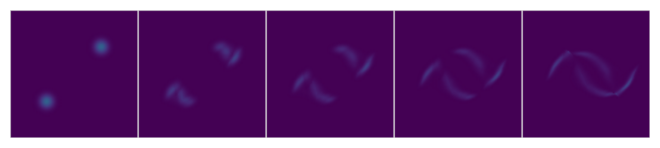

In [18]:
# for every run, show logprob_<src>-to-<trgt>_sidebyside.png
for run in runs:
    src = run.split("-")[0]
    trgt = run.split("-")[1]  
    runname = src
    if "-ot" in run:
        runname += " OT"
    print(runname)
    plt.imshow(plt.imread(f"{currentdir}/runs/{run}/logprob_{src}-to-{trgt}_sidebyside.png"))
    # remove axes
    plt.axis('off')
    # remove ticks
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    plt.tight_layout(pad=0)
    plt.show()


In [35]:
# get logprobs_train.npy and losses.npy for every run into a dict
logprobs_train = {}
losses = {}
for run in runs:
    logprobs_train[run] = np.load(f"{currentdir}/runs/{run}/logprobs_train.npy")
    losses[run] = np.load(f"{currentdir}/runs/{run}/losses.npy")


In [ ]:
# plot logprobs_train.npy for every run
set_seaborn_style()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_yscale("symlog")
for run in runs:
    # first column is x, second column is y
    ax.plot(logprobs_train[run][:, 0], logprobs_train[run][:, 1], label=run)
# y log scale
set_style_after(ax, legend=True, loc="upper right", bbox_to_anchor=(1.0, .51), fs=12)
plt.show()
plt.close()

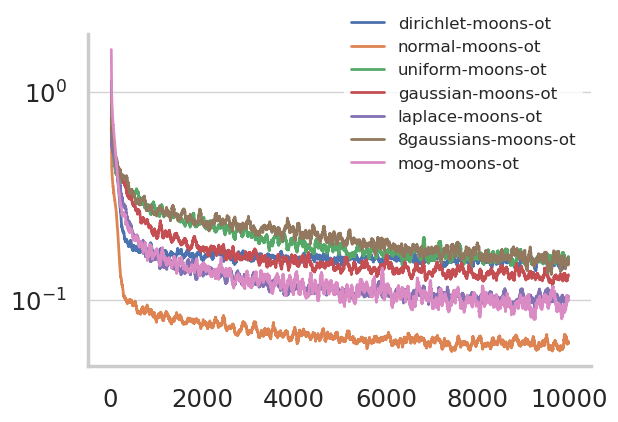

In [49]:
# plot losses.npy for every run
# apply smoothing to losses.npy
losses_smooth = {}
# first column is x=step, second column is y=loss
window_size = 51  # Use odd number to ensure equal padding on both sides
for run in runs:
    # Apply smoothing separately to x and y columns
    x = losses[run][:, 0]  # time steps
    y = losses[run][:, 1]  # loss values
    # Smooth only the y values
    y_smooth = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
    # Trim x and y_smooth to same length
    trim = (window_size - 1) // 2
    x = x[trim:-trim]
    # Verify lengths match
    assert len(x) == len(y_smooth), f"Length mismatch: x={len(x)}, y_smooth={len(y_smooth)}"
    # Recombine into array
    losses_smooth[run] = np.column_stack((x, y_smooth))

# subsample, only plot every n'th point
n = 1
losses_smooth = {run: losses_smooth[run][::n, :] for run in runs}

set_seaborn_style()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_yscale("log")
for run in runs:
    ax.plot(
        losses_smooth[run][:, 0], losses_smooth[run][:, 1], label=run, linewidth=2
    )
set_style_after(ax, legend=True, loc="upper right", bbox_to_anchor=(1.0, 1.1), fs=12)
plt.show()
plt.close()